### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Exploratory** **Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

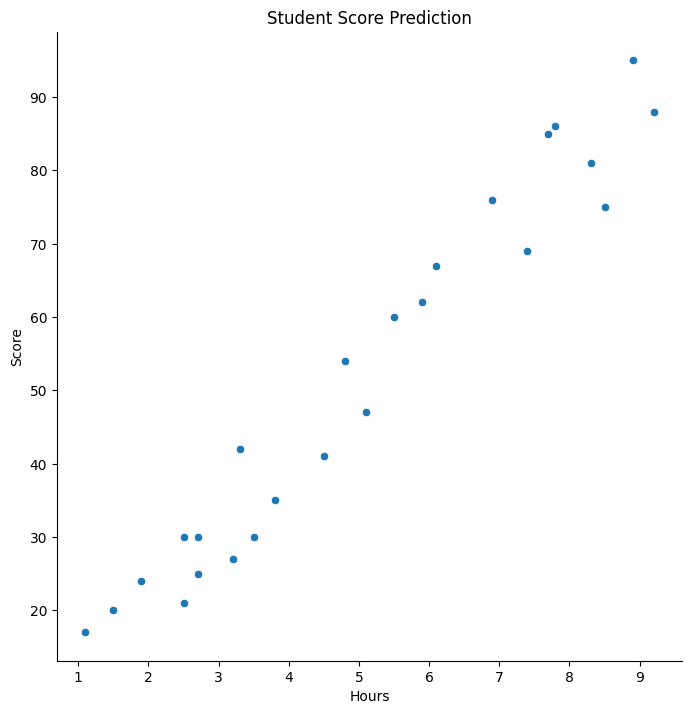

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Student Score Prediction')
plt.show()

In [ ]:
Investigate Of Feature Engineering

In [ ]:
df = data.copy()

In [ ]:
#check duplicated data
print("Data sebelum pemeriksaan duplikat:")
print(df.shape)

Data sebelum pemeriksaan duplikat:
(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("\nData setelah pemeriksaan duplikat:")
print(df.shape)


Data setelah pemeriksaan duplikat:
(25, 2)


In [ ]:
#check missing value
df.isnull().sum()

,0
Hours,0
Scores,0


There is no missing value


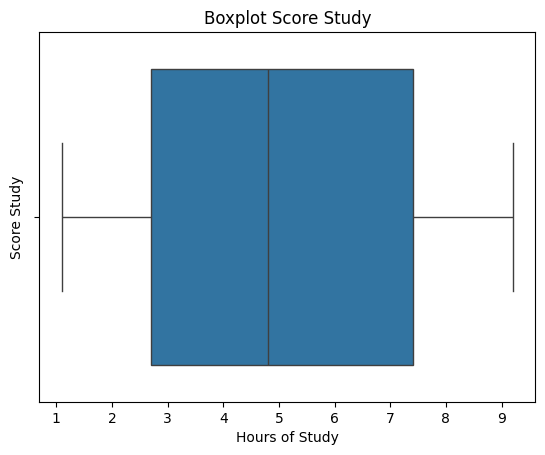

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#outliner analisis
sns.boxplot(x="Hours", data=df)

#menambahkan label sumbu judul
plt.xlabel("Hours of Study")
plt.ylabel("Score Study")
plt.title("Boxplot Score Study")

#menampilkan plot
plt.show()

There is no outlier value

Spliting the data

In [ ]:
#Hours study data
x = df['Hours']
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
#Score study data
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
#import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
#split the data for train and test
#train : test = 75 : 25 atau 80:20 atau 70:30 atau 85:15, size tarin > test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=42)

In [ ]:
x_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [ ]:
x_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


In [ ]:
Liner Regression

In [ ]:
#importing linear regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
#create new axis for x colomn in array
import numpy as np

# x_train and x_test are already numpy arrays, so remove the to_numpy() calls.
# x_train = x_train.to_numpy()
# x_test = x_test.to_numpy()

#add new axis to the end
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [ ]:
#array
x_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
#fitting the model using linear rgression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(x_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [ ]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
#predict the score for the test value
y_pred = lr_model.predict(x_test)


In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

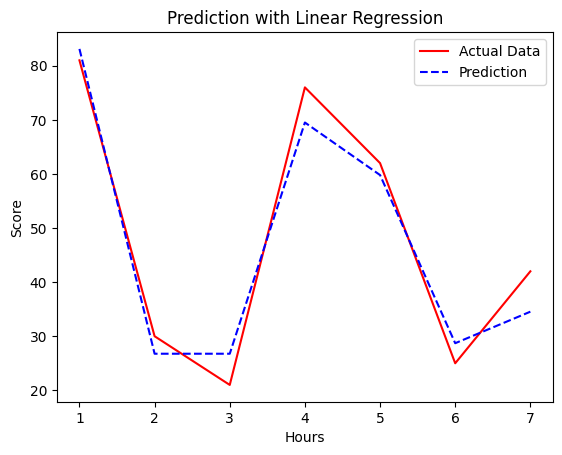

In [ ]:
# plotting the actual and predicted value
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.title('Prediction with Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
#importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
#calculate R square value
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square linear regression:',rsq)

r square linear regression: 0.9553509219739938


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
#predicting the score for the test value
y_pred_dt = dt_model.predict(x_test)

In [ ]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

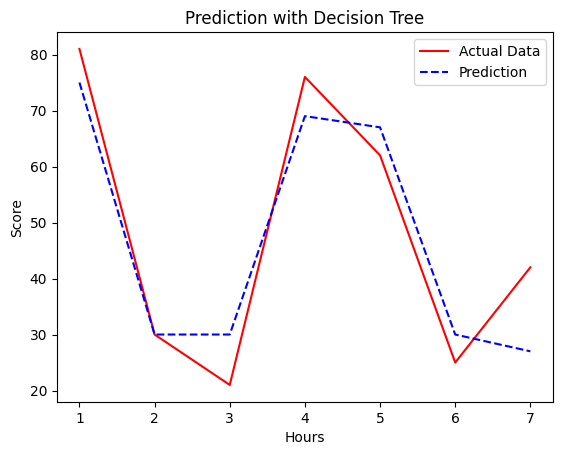

In [ ]:
#plotting the actual and the predicted value

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.title('Prediction with Decision Tree')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
#calculate R square value
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Decicision Tree Results:',rsq_dt)

r square Decicision Tree Results: 0.8803859268443893


Using random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#predicting the score for the test value
y_pred_rf = model_rf.predict(x_test)

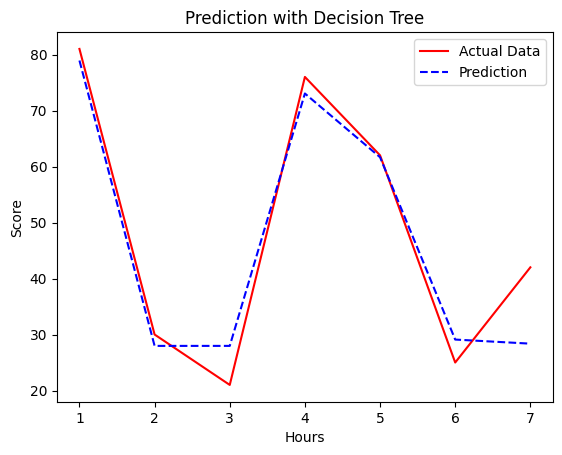

In [ ]:
#plotting the actual and the predicted value

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.title('Prediction with Decision Tree')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
#calculate R square value
rsq_rf = r2_score(y_test,y_pred_rf)

In [ ]:
print('r square Random Forest Results:',rsq_rf)

r square Random Forest Results: 0.9271870892746435


Dari ketiga alogaritma, yang paling tinggi akurasinya adalah menggunakan model linear regression dengan nilai akurat sebesar 95%